In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [5]:
transactions 

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [6]:
# Merge data
transactions = transactions.merge(products[['ProductID', 'Category']], on='ProductID', how='left')
customer_profiles = transactions.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    purchase_count=('TransactionID', 'count'),
    avg_purchase_value=('TotalValue', 'mean'),
    diversity_of_categories=('Category', lambda x: len(x.unique())),
    recency_days=('TransactionDate', lambda x: (pd.to_datetime('today') - pd.to_datetime(x).max()).days)
).reset_index()


In [7]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Electronics
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Electronics


In [8]:
# Merge customer profile data with demographic information
customer_profiles = customer_profiles.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')


In [9]:
customer_profiles

,CustomerID,total_spend,purchase_count,avg_purchase_value,diversity_of_categories,recency_days,Region
0,C0001,3354.52,5,670.904000,3,86,South America
1,C0002,1862.74,4,465.685000,2,56,Asia
2,C0003,2725.38,4,681.345000,3,156,South America
3,C0004,5354.88,8,669.360000,3,36,South America
4,C0005,2034.24,3,678.080000,2,85,Asia
...,...,...,...,...,...,...,...
194,C0196,4982.88,4,1245.720000,3,44,Europe
195,C0197,1928.65,3,642.883333,2,31,Europe
196,C0198,931.83,2,465.915000,2,115,Europe
197,C0199,1979.28,4,494.820000,2,94,Europe


In [10]:
# Preprocess data
customer_profiles['Region'] = customer_profiles['Region'].astype(str)


In [11]:

# Define Preprocessor for categorical and numerical data
encoder = ColumnTransformer(
    transformers=[
        ('region', OneHotEncoder(sparse_output=False), ['Region'])
    ],
    remainder='passthrough'
)


In [12]:
# Apply transformation
processed_data = encoder.fit_transform(customer_profiles.drop(columns=['CustomerID']))
encoded_columns = encoder.get_feature_names_out()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)


In [13]:
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


In [18]:
# Find optimal number of clusters (2 to 10)
db_index_scores = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    
    # Calculate DB Index and Silhouette Score
    db_index = davies_bouldin_score(scaled_data, cluster_labels)
    silhouette = silhouette_score(scaled_data, cluster_labels)
    db_index_scores.append(db_index)
    silhouette_scores.append(silhouette)


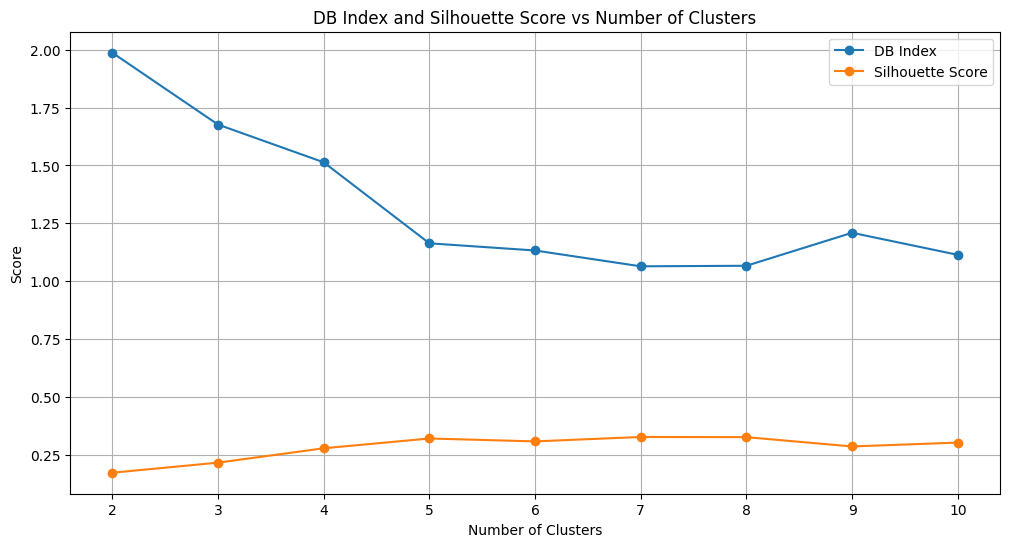

In [19]:
# Plot DB Index and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, db_index_scores, marker='o', label='DB Index')
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('DB Index and Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Select optimal number of clusters (based on lowest DB Index)
optimal_k = k_values[np.argmin(db_index_scores)]
print(f"Optimal number of clusters (lowest DB Index): {optimal_k}")


Optimal number of clusters (lowest DB Index): 7


In [21]:
# Final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_data)

In [22]:
# Calculate final DB Index
final_db_index = davies_bouldin_score(scaled_data, customer_profiles['Cluster'])
print(f"Final DB Index: {final_db_index}")

Final DB Index: 1.0642268035888385


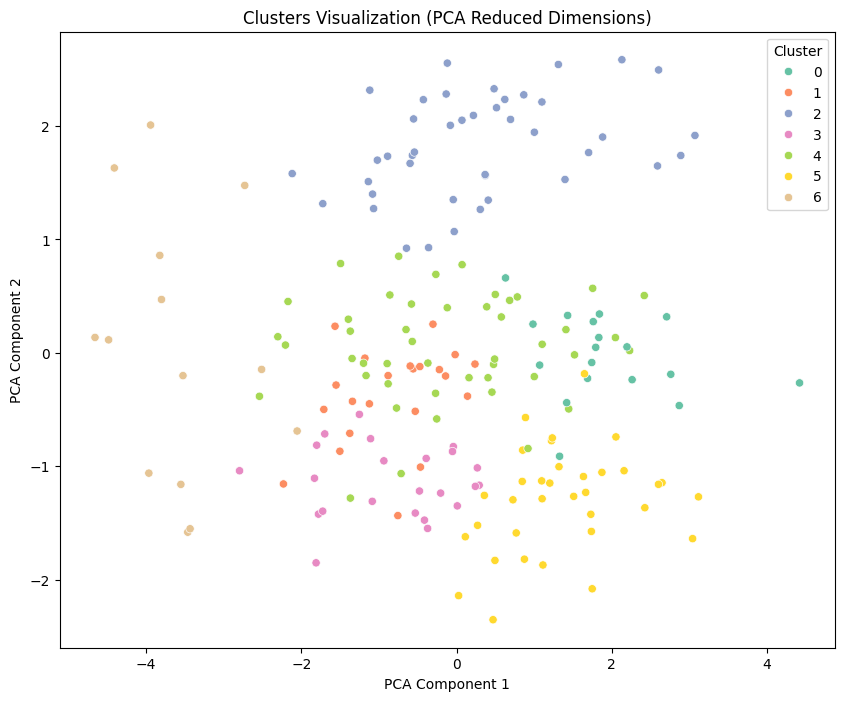

In [23]:
# Visualize Clusters (PCA Scatter Plot)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=customer_profiles['Cluster'], palette='Set2')
plt.title('Clusters Visualization (PCA Reduced Dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [24]:

# Save clustering results
customer_profiles.to_csv("Clustering_Results.csv", index=False)
print("Clustering results saved to Clustering_Results.csv")

Clustering results saved to Clustering_Results.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge data
transactions = transactions.merge(products[['ProductID', 'Category']], on='ProductID', how='left')
customer_profiles = transactions.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    purchase_count=('TransactionID', 'count'),
    avg_purchase_value=('TotalValue', 'mean'),
    diversity_of_categories=('Category', lambda x: len(x.unique())),
    recency_days=('TransactionDate', lambda x: (pd.to_datetime('today') - pd.to_datetime(x).max()).days)
).reset_index()

# Preprocess data
customer_profiles['Region'] = customer_profiles['Region'].astype(str)


# Apply transformation
processed_data = encoder.fit_transform(customer_profiles.drop(columns=['CustomerID']))
encoded_columns = encoder.get_feature_names_out()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


# Find optimal number of clusters (2 to 10)
db_index_scores = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    
    # Calculate DB Index and Silhouette Score
    db_index = davies_bouldin_score(scaled_data, cluster_labels)
    silhouette = silhouette_score(scaled_data, cluster_labels)
    db_index_scores.append(db_index)
    silhouette_scores.append(silhouette)

    
    # Plot DB Index and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, db_index_scores, marker='o', label='DB Index')
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('DB Index and Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


# Select optimal number of clusters (based on lowest DB Index)
optimal_k = k_values[np.argmin(db_index_scores)]
print(f"Optimal number of clusters (lowest DB Index): {optimal_k}")
 output : Optimal number of clusters (lowest DB Index): 7

# Final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate final DB Index
final_db_index = davies_bouldin_score(scaled_data, customer_profiles['Cluster'])
print(f"Final DB Index: {final_db_index}")

Final DB Index: 1.0642268035888385
    
    # Visualize Clusters (PCA Scatter Plot)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=customer_profiles['Cluster'], palette='Set2')
plt.title('Clusters Visualization (PCA Reduced Dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
